In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [15]:
# Define image size and directories
IMAGE_SIZE = [299, 299]
train_directory = r"C:\Users\castr\OneDrive\Desktop\img.class\melon_dataset\train"
test_directory = r"C:\Users\castr\OneDrive\Desktop\img.class\melon_dataset\test"
val_directory = r"C:\Users\castr\OneDrive\Desktop\img.class\melon_dataset\val"

In [16]:
# Data augmentation for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [17]:
# Data augmentation for testing set (only rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

In [18]:
# Load training and testing sets with data augmentation
training_set = train_datagen.flow_from_directory(
    train_directory,
    target_size=IMAGE_SIZE,
    batch_size=32,
    class_mode='categorical'
)

test_set = test_datagen.flow_from_directory(
    test_directory,
    target_size=IMAGE_SIZE,
    batch_size=32,
    class_mode='categorical'
)

Found 1920 images belonging to 10 classes.
Found 880 images belonging to 10 classes.


In [19]:
# Add preprocessing layer to the front of Xception
xception = Xception(input_shape=(299, 299, 3), weights='imagenet', include_top=False)

# Freeze the layers
for layer in xception.layers:
    layer.trainable = False

# Global Average Pooling
x = GlobalAveragePooling2D()(xception.output)

# Fully Connected Layer
x = Dense(128, activation='relu')(x)

# Output Layer
output_tensor = Dense(10, activation='softmax')(x)

# Create the model
model = Model(inputs=xception.input, outputs=output_tensor)

In [20]:
# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [21]:
# Train the model
history = model.fit(
    training_set,
    validation_data=test_set,
    epochs=10,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

Epoch 1/10
60/60 [==============================] - 318s 5s/step - loss: 0.8400 - accuracy: 0.7568 - val_loss: 0.3303 - val_accuracy: 0.8989
Epoch 2/10
60/60 [==============================] - 321s 5s/step - loss: 0.3190 - accuracy: 0.9010 - val_loss: 0.2160 - val_accuracy: 0.9352
Epoch 3/10
60/60 [==============================] - 285s 5s/step - loss: 0.2174 - accuracy: 0.9333 - val_loss: 0.1559 - val_accuracy: 0.9591
Epoch 4/10
60/60 [==============================] - 284s 5s/step - loss: 0.1695 - accuracy: 0.9536 - val_loss: 0.1326 - val_accuracy: 0.9614
Epoch 5/10
60/60 [==============================] - 279s 5s/step - loss: 0.1436 - accuracy: 0.9583 - val_loss: 0.1224 - val_accuracy: 0.9648
Epoch 6/10
60/60 [==============================] - 281s 5s/step - loss: 0.1080 - accuracy: 0.9703 - val_loss: 0.0919 - val_accuracy: 0.9761
Epoch 7/10
60/60 [==============================] - 279s 5s/step - loss: 0.0892 - accuracy: 0.9797 - val_loss: 0.0750 - val_accuracy: 0.9841
Epoch 8/10
60

In [22]:
# Save the model
model.save('melon_species_Xception.h5')

C:\Users\castr\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


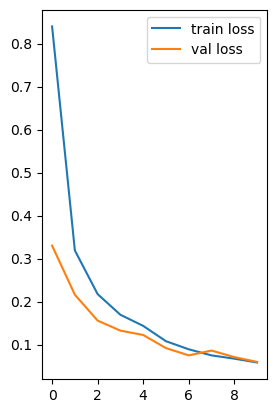

In [23]:
# Plot loss and accuracy curves
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()

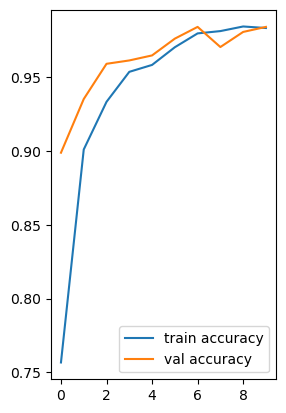

In [24]:

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()